In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.svm import SVC

df = pandas.read_csv('http://pogo.software/me4ml/slip_data_full.csv')

f1 = np.array(df['f1'][:])
f1ang = np.array(df['f1ang'][:])
f2 = np.array(df['f2'][:])
f2ang = np.array(df['f2ang'][:])
m = np.array(df['m'][:])
slips = np.array(df['slips'][:])

## combine these parameters into a single variable
X = np.column_stack((f1,f1ang,f2, f2ang))
y = np.array(df['slips'][:]) # classes

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
def gen_sample_grid(npt=200, x_limit = 4, y_limit = 4):
  x1line = np.linspace(0, x_limit, npt)
  x2line = np.linspace(0, y_limit, npt)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  #Xgrid = np.array([x1grid, x2grid]).reshape([2,npt*npt]).T
  return x1grid, x2grid, x1line, x2line

(1000000, 4)
(1000000,)


Text(0, 0.5, 'Angle of Force 2')

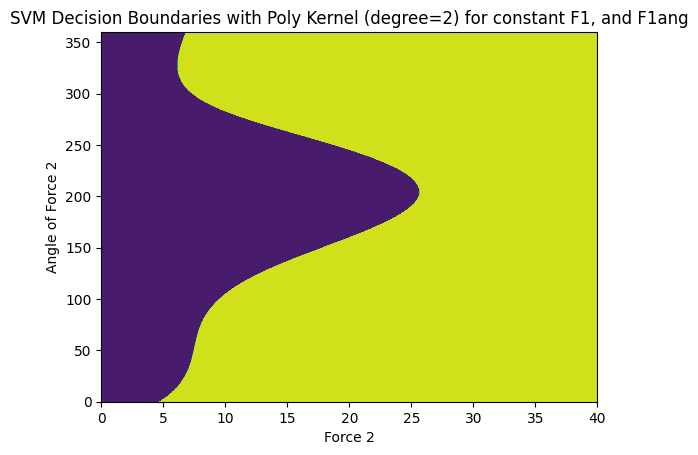

In [18]:
## doing the SVM
npt=1000
x1grid, x2grid, x1line, x2line = gen_sample_grid(npt, 40, 360)
f1 = np.full((npt, npt), 10)
f1ang = np.full((npt,npt),18)

#Xgrid = np.column_stack((f1,f1ang,x1grid,x2grid))
Xgrid = np.array([f1,f1ang,x1grid, x2grid]).reshape([4,npt*npt]).T

print(Xgrid.shape)
svm = SVC(C=1000, gamma='scale',kernel='rbf',degree=2)
svm.fit(X,y)
data = svm.predict(Xgrid)
print(data.shape)
data = np.reshape(data, [npt,npt])


plt.contourf(x1line,x2line,data)
#plt.scatter(X[y==0,0],X[y==0,1],label='Class 0',marker='o')
#plt.scatter(X[y==1,0],X[y==1,1],label='Class 1',marker='x')
plt.title('SVM Decision Boundaries with Poly Kernel (degree=2) for constant F1, and F1ang')
plt.xlabel('Force 2')
plt.ylabel('Angle of Force 2')